In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append("..")

In [3]:
import numpy as np
from scipy.stats import norm

from MNIST_VAE import Hyper, MnistVae

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist

# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
h = Hyper(epochs=50)
model = MnistVae(h)
        
history = model.fit(x_train, x_train,
        shuffle=True,
        epochs=h.epochs,
        batch_size=h.batch_size,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 188.5323 - val_loss: 171.1624
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 169.1033 - val_loss: 167.3221
Epoch 3/50
60000/60000 [==============================] - 2s - loss: 165.7503 - val_loss: 164.6721
Epoch 4/50
60000/60000 [==============================] - 2s - loss: 163.4962 - val_loss: 162.6920
Epoch 5/50
60000/60000 [==============================] - 2s - loss: 161.6129 - val_loss: 161.2797
Epoch 6/50
60000/60000 [==============================] - 2s - loss: 160.0712 - val_loss: 159.7457
Epoch 7/50
60000/60000 [==============================] - 2s - loss: 158.8735 - val_loss: 158.6734
Epoch 8/50
60000/60000 [==============================] - 2s - loss: 157.9715 - val_loss: 157.7920
Epoch 9/50
60000/60000 [==============================] - 2s - loss: 157.2229 - val_loss: 157.1647
Epoch 10/50
60000/60000 [==============================] - 

In [6]:
history.history

{'val_loss': [171.1623554992676,
  167.32209762573243,
  164.67206909179689,
  162.6920021057129,
  161.27973266601563,
  159.74573577880858,
  158.6734019470215,
  157.79202545166015,
  157.16471542358397,
  156.88256088256836,
  156.5117950439453,
  156.3062516784668,
  155.9756867980957,
  155.32805068969728,
  155.0517170715332,
  155.13755096435546,
  154.95593582153322,
  154.54639892578126,
  154.1653530883789,
  153.94581848144531,
  153.99210739135742,
  153.70013656616212,
  154.33533950805665,
  153.41162811279298,
  153.43487991333006,
  153.8744889831543,
  153.2142939758301,
  152.63903686523437,
  153.80259918212892,
  152.82566787719728,
  152.60477752685546,
  152.52384384155275,
  152.48294982910156,
  152.7291343688965,
  152.23078552246093,
  151.95537658691407,
  152.29316345214843,
  152.15655975341798,
  152.4988868713379,
  152.096357421875,
  152.311524810791,
  151.79710067749022,
  152.45047271728515,
  151.56936065673827,
  151.63546783447265,
  151.63578735

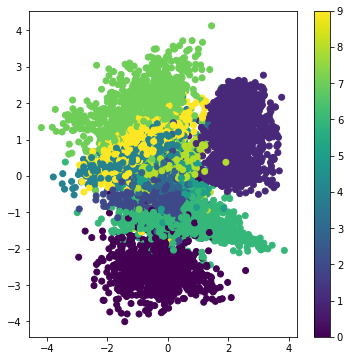

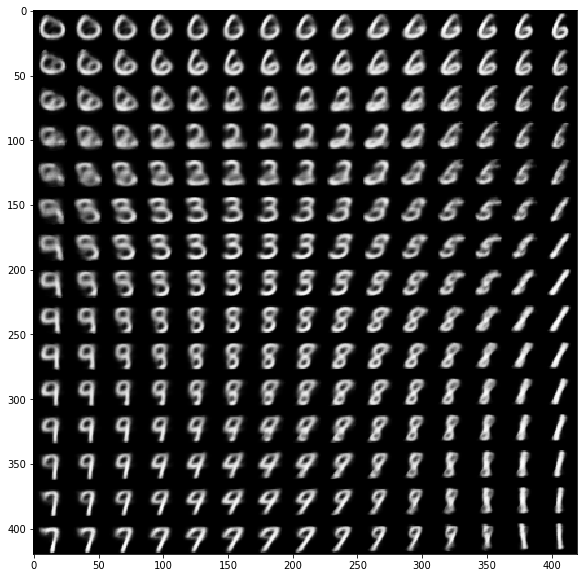

In [7]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = model.encoder.predict(x_test, batch_size=h.batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = model.generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

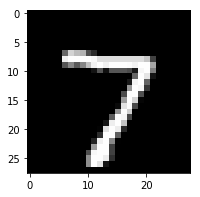

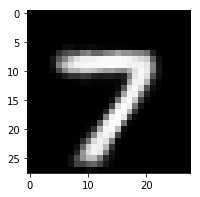

In [8]:
encoding = model.encode(x_test[:3])
decoding = model.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

In [9]:
model.save('../models/mnist_test.h5')

In [11]:
model2 = MnistVae(h)
model2.load_weights('../models/mnist_test.h5')

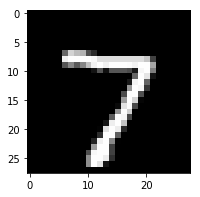

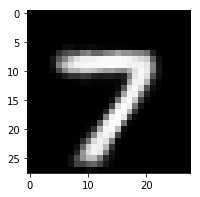

In [12]:
encoding = model2.encode(x_test[:3])
decoding = model2.generate(encoding)

plt.figure(figsize=(3, 3))
plt.imshow(x_test[0].reshape((28, 28)), cmap='Greys_r')
plt.show()

plt.figure(figsize=(3, 3))
plt.imshow(decoding[0].reshape((28, 28)), cmap='Greys_r')
plt.show()